In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
red['wine_type'] = 'red'
white['wine_type'] = 'white'

In [4]:
data = pd.concat([red, white], axis=0)

In [5]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
data['wine_type'] = data['wine_type'].map({'red': 0, 'white': 1})

In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object

In [8]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


<Axes: xlabel='wine_type', ylabel='count'>

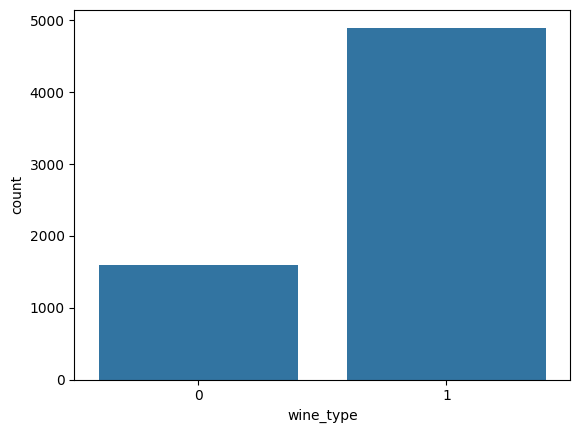

In [9]:
sns.countplot(data=data, x = 'wine_type')

<Axes: xlabel='quality', ylabel='Count'>

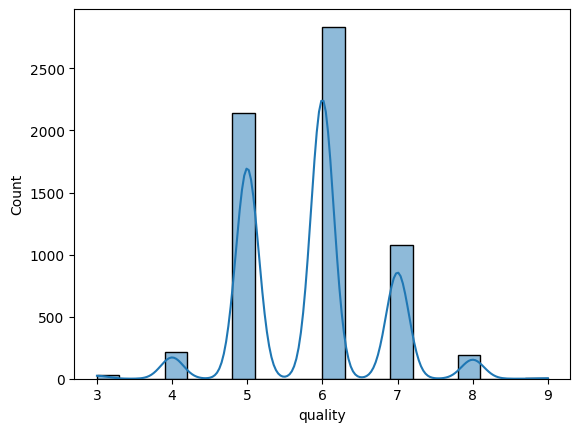

In [10]:
sns.histplot(data=data, x = 'quality', kde=True, bins=20)

<Axes: xlabel='quality', ylabel='count'>

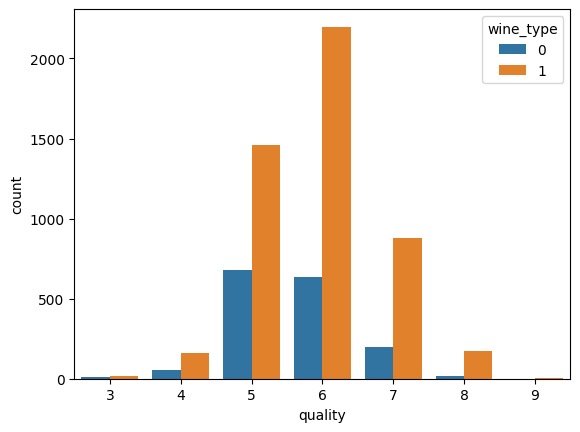

In [11]:
sns.countplot(data=data, x = 'quality', hue='wine_type')

In [ ]:
sns.pairplot(data=data, hue='quality')

In [ ]:
data.corr(numeric_only=True)['quality'].sort_values()

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

## TREE METHODS


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dm = DecisionTreeRegressor()

dm.fit(X_train, y_train)
y_pred = dm.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rm = RandomForestRegressor(n_estimators=100)

rm.fit(X_train, y_train)
y_pred = rm.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

## Clearly Randome Forest is performing well

## SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
sm = SVR()

sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

SVR performing very porrly.

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
km = KNeighborsRegressor(n_neighbors=1)

km.fit(X_train, y_train)
y_pred = km.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse_values = []

for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred_i))
    rmse_values.append(rmse)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), rmse_values, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('RMSE')
plt.title('K vs. RMSE for KNN Regression')
plt.grid(True)
plt.show()

In [ ]:
km = KNeighborsRegressor(n_neighbors=17)

km.fit(X_train, y_train)
y_pred = km.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
sm = SVR()

sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

In [ ]:
km = KNeighborsRegressor(n_neighbors=17)

km.fit(X_train, y_train)
y_pred = km.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

### Still Random Forest is performing best.